In [107]:
import numpy as np
from quantecon.game_theory import lemke_howson, NormalFormGame, Player
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
def Experimental_Analysis(n, loops, capping = False):
    
    step = []
    for i in range(loops):
        num = 0
        A,B = [np.random.rand(n, n) for i in range(2)]
        q = NormalFormGame((Player(A), Player(B)))
        if not capping:
            num = lemke_howson(q, init_pivot = 0)[1]
            step.append(num)
        else:
            for j in range(n):
                num_iter, success = lemke_howson(q, init_pivot = j, max_iter = capping)[1:]
                num += num_iter
                if success:
                    step.append(num)
                    break
            if not success:
                num = lemke_howson(q, init_pivot = 0)[1]
                step.append(num)
                
    return step

In [124]:
step1 = np.array(Experimental_Analysis(40, 10000, capping = 10))
step2 = np.array(Experimental_Analysis(40, 10000))

In [125]:
np.mean(step1)

55.871899999999997

In [126]:
np.mean(step2)

110.6525

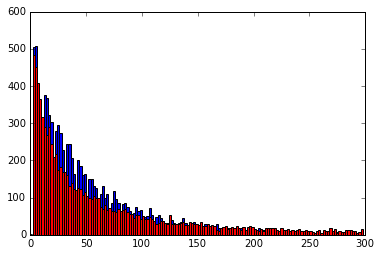

In [127]:
plt.figure()

for (step, c) in zip([step1, step2], ['b', 'r']):
    plt.hist(step, bins=np.arange(0, 300, 2), color = c)

plt.show()